In [40]:
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer

with open('inside_out.txt', 'r') as file:
    data=file.read()

from nltk import tokenize
sentences = tokenize.sent_tokenize(data)
print (len(sentences))

3459


In [41]:
sid = SentimentIntensityAnalyzer()

scores = []
for sentence in sentences:
    ss = sid.polarity_scores(sentence)
    scores.append([sentence, ss['neg'], ss['neu'], ss['pos'], ss['compound']])
    
movie_score = pd.DataFrame(scores, columns=['sentence', 'neg', 'neu', 'pos', 'compound'])

In [42]:
def closer_look(start, end):
    for x in range(start,end):
        print (movie_score.iloc[x]['sentence'])
        print (movie_score.rolling(window = rolling_window).sum()['compound'][x])

In [44]:
def plot_sentiment(movie_score):
    import matplotlib
    import matplotlib.pyplot as plt

    rolling_window = 100
    mult = 1
    plt.rc('font', size=30)

    x = np.arange(0, len(movie_score.index), 1)
    y_neg = movie_score.rolling(window = rolling_window).sum()['neg'] * mult
    y_pos = movie_score.rolling(window = rolling_window).sum()['pos'] * mult
    y_compound = movie_score.rolling(window = rolling_window).sum()['compound'] * mult

    plt.figure(figsize=(50,20))
    plt.plot(x, y_neg)
    plt.plot(x, y_pos)
    plt.plot(x, y_compound)

    plt.legend(['y = neg', 'y = pos', 'y = compound'], loc='lower right')
    plt.xticks(np.arange(0, len(movie_score.index), 200))
    
    import pylab
    plt.figure(figsize=(50,20))
    plt.plot(x, y_compound)
    plt.xticks(np.arange(0, len(movie_score.index), 200))
    return plt

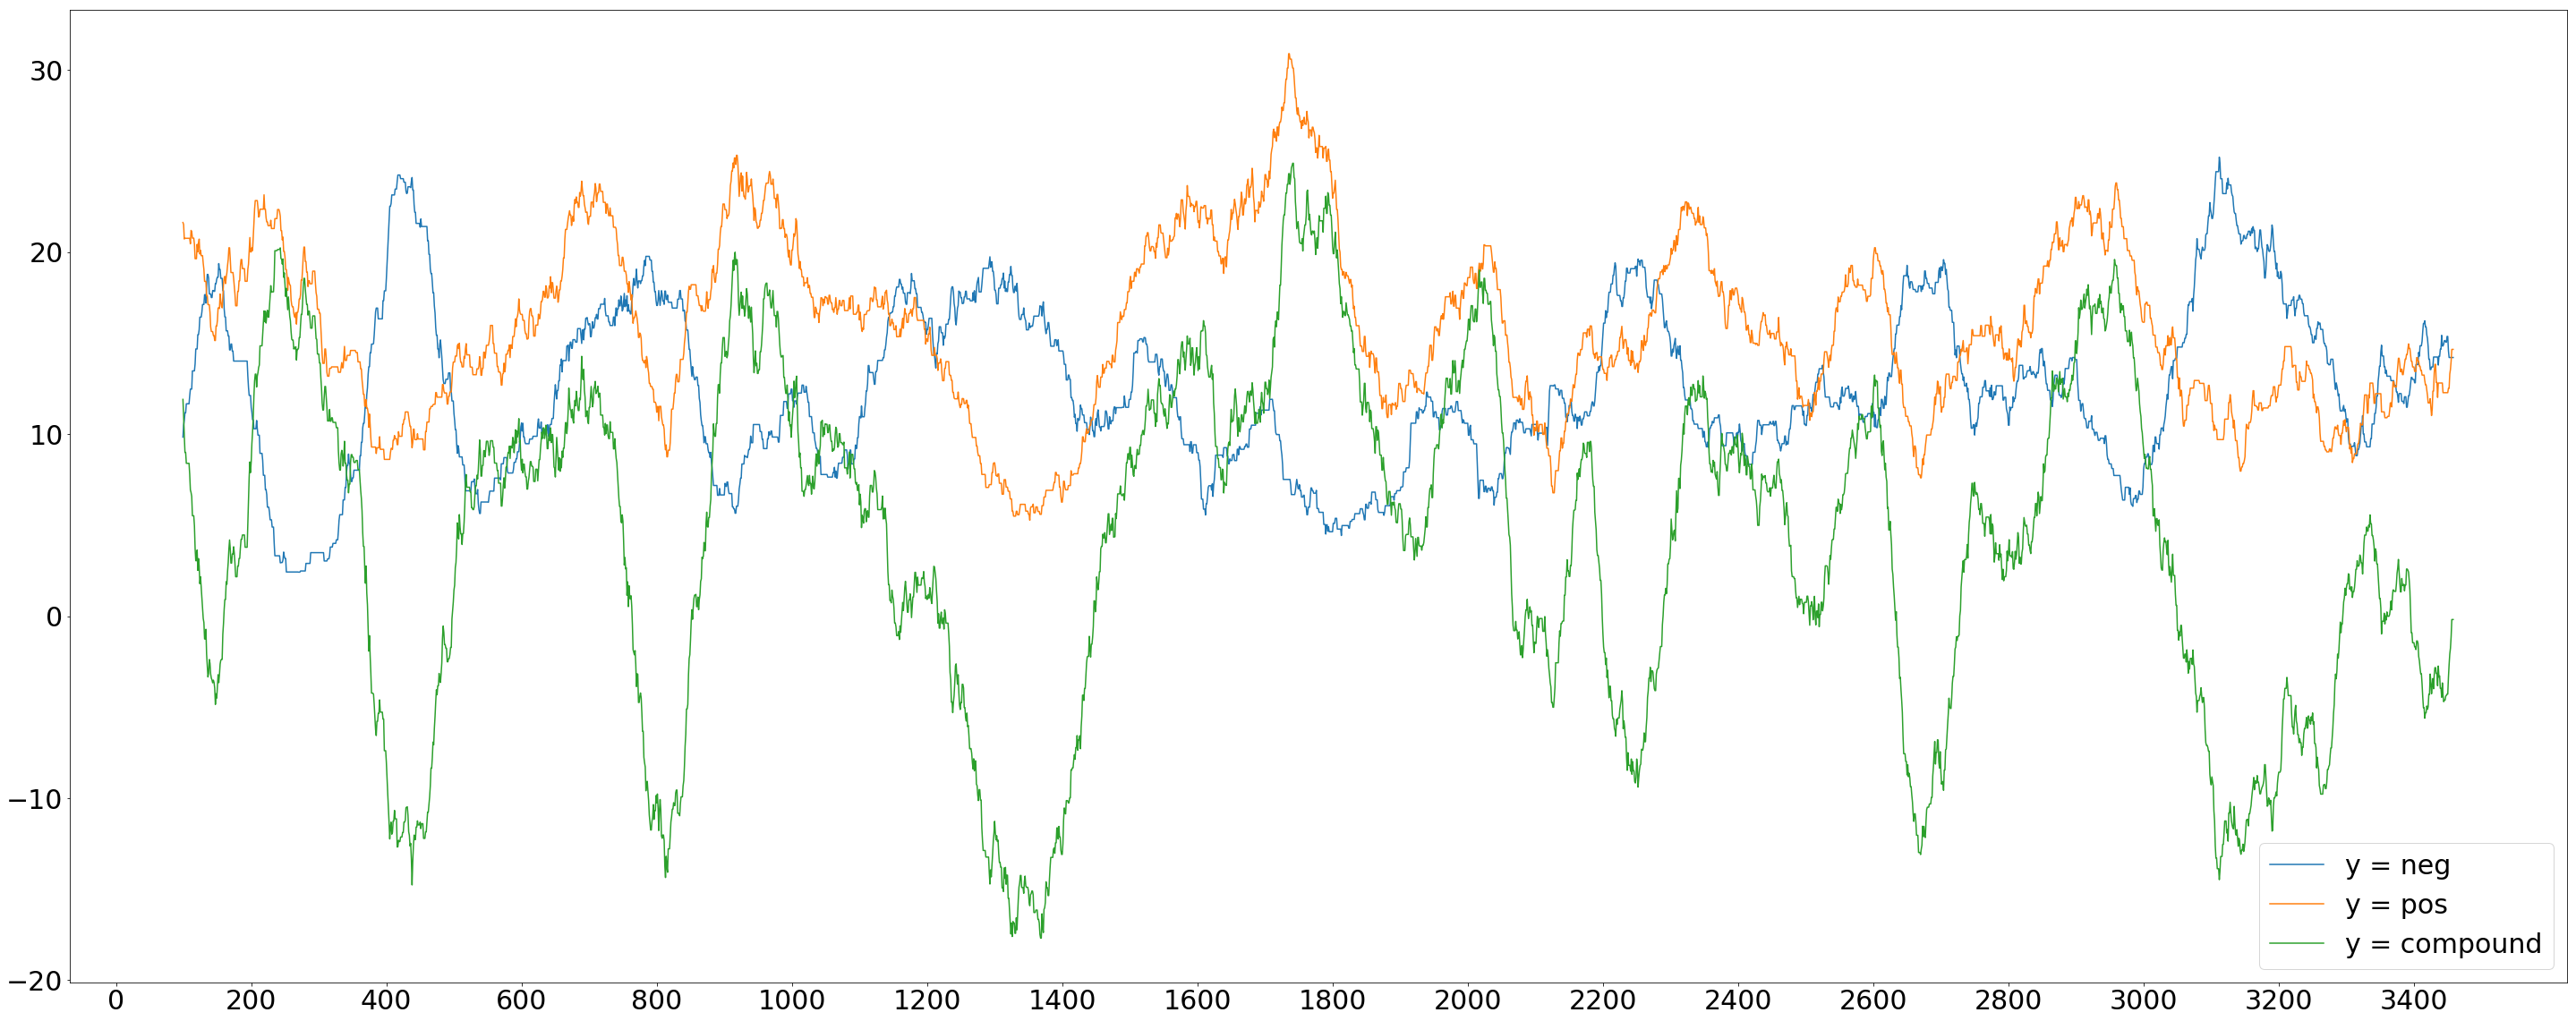

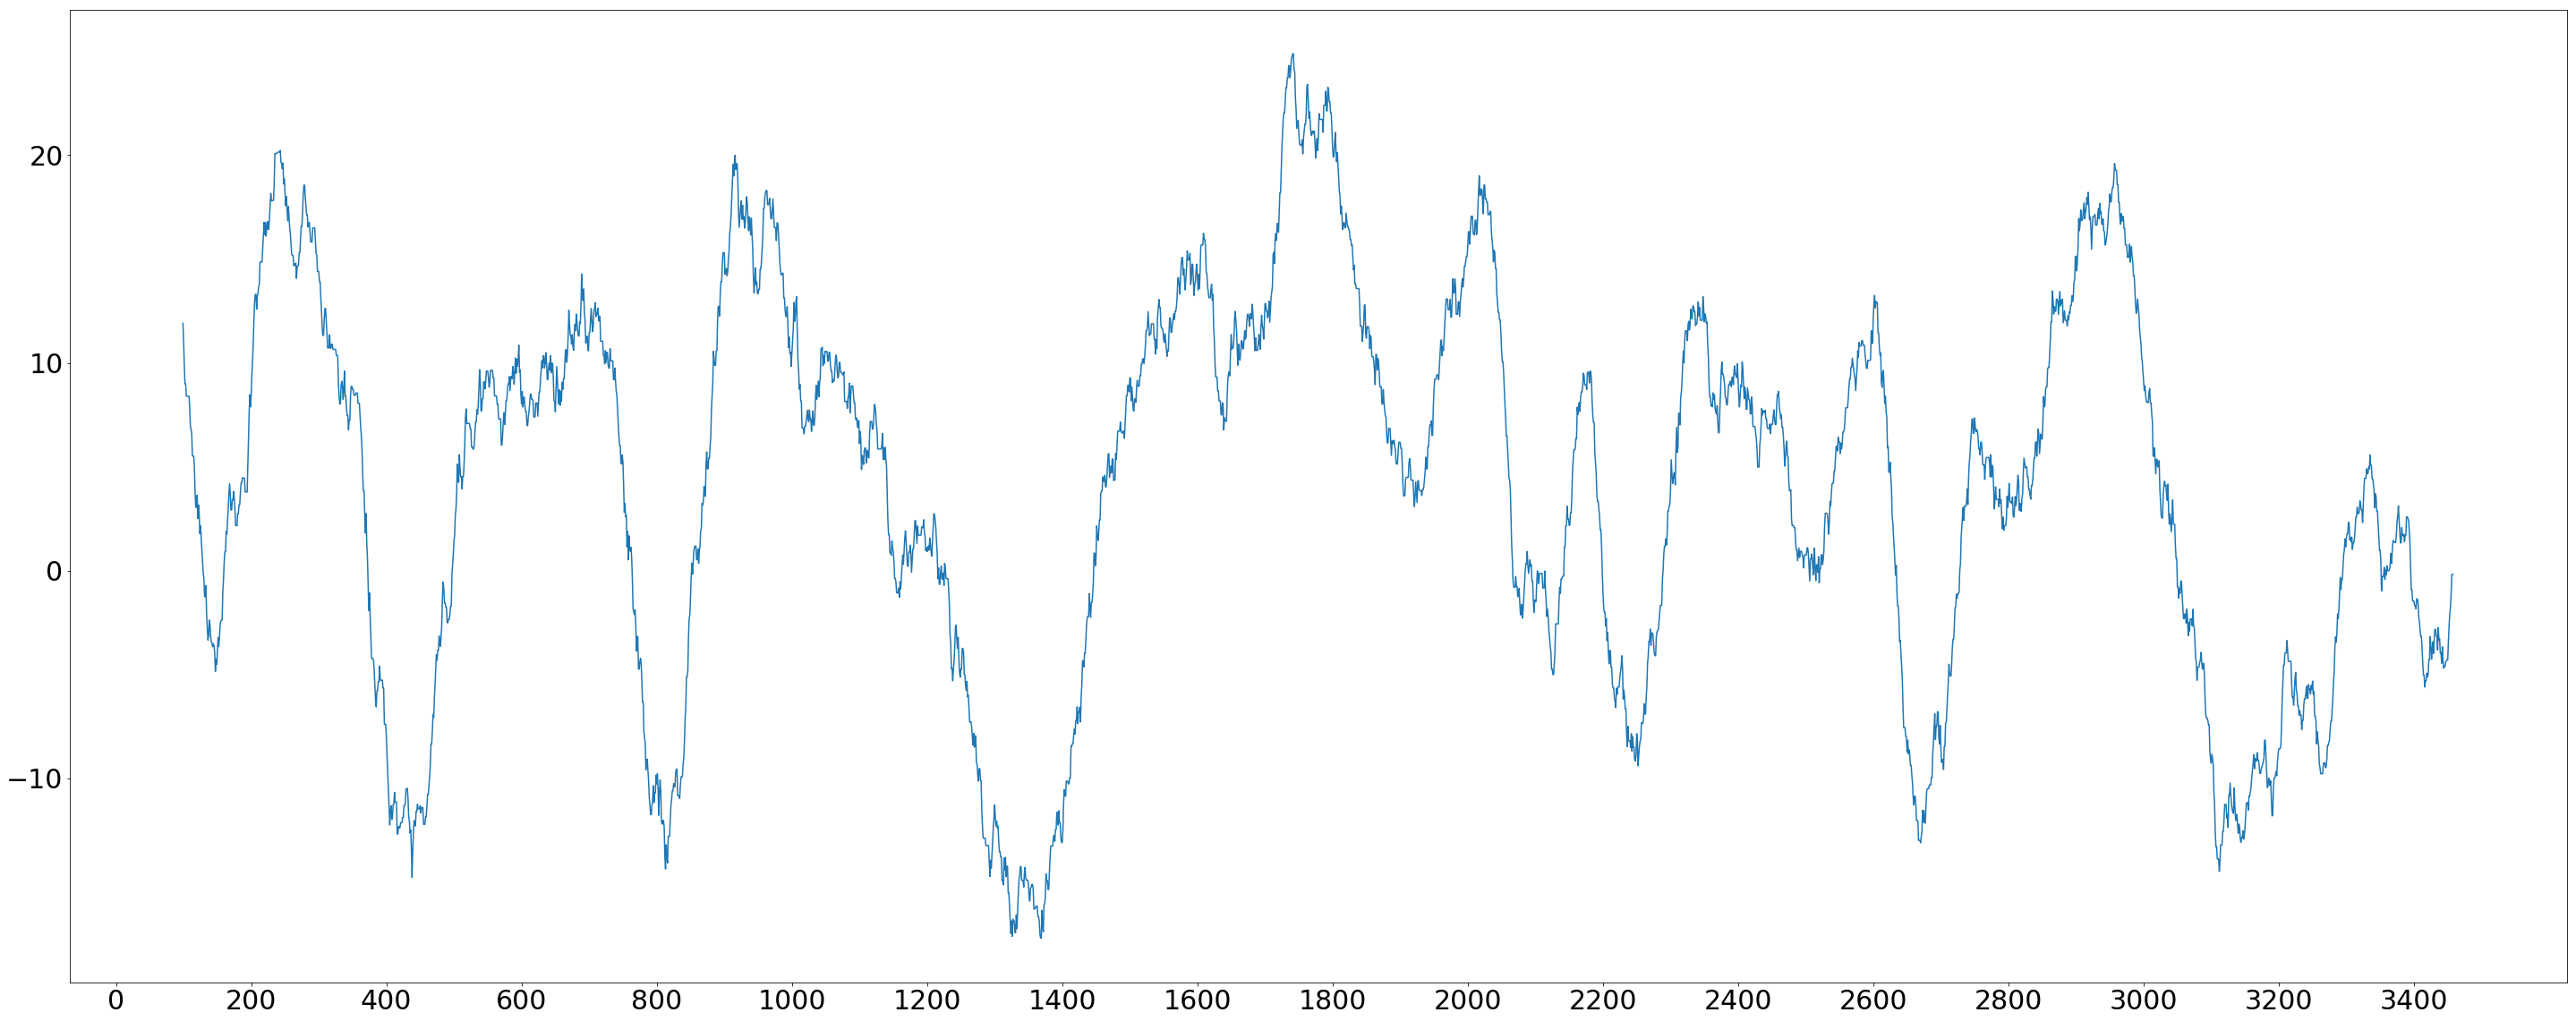

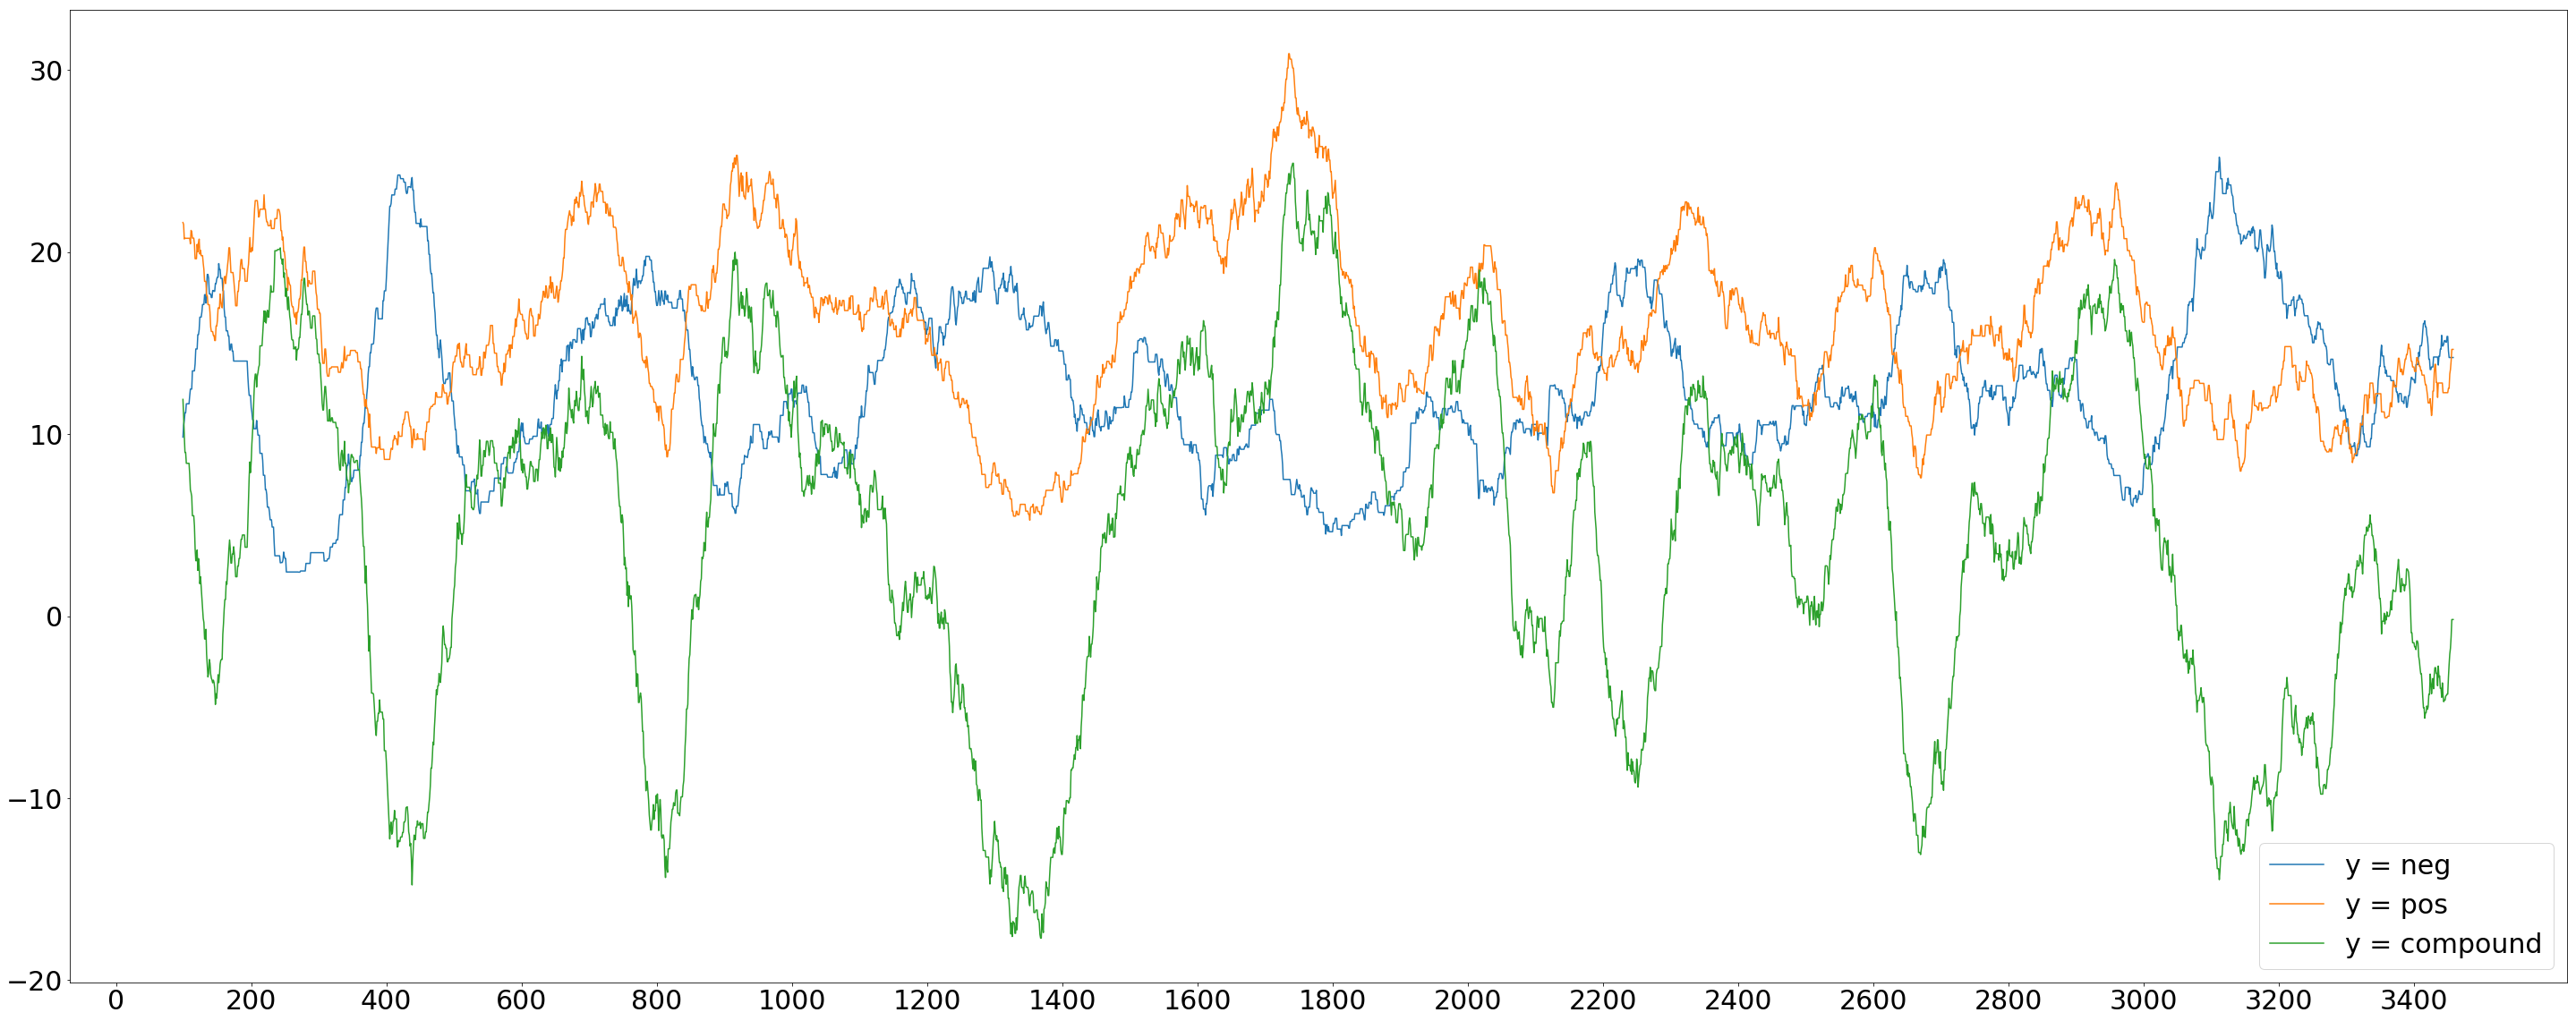

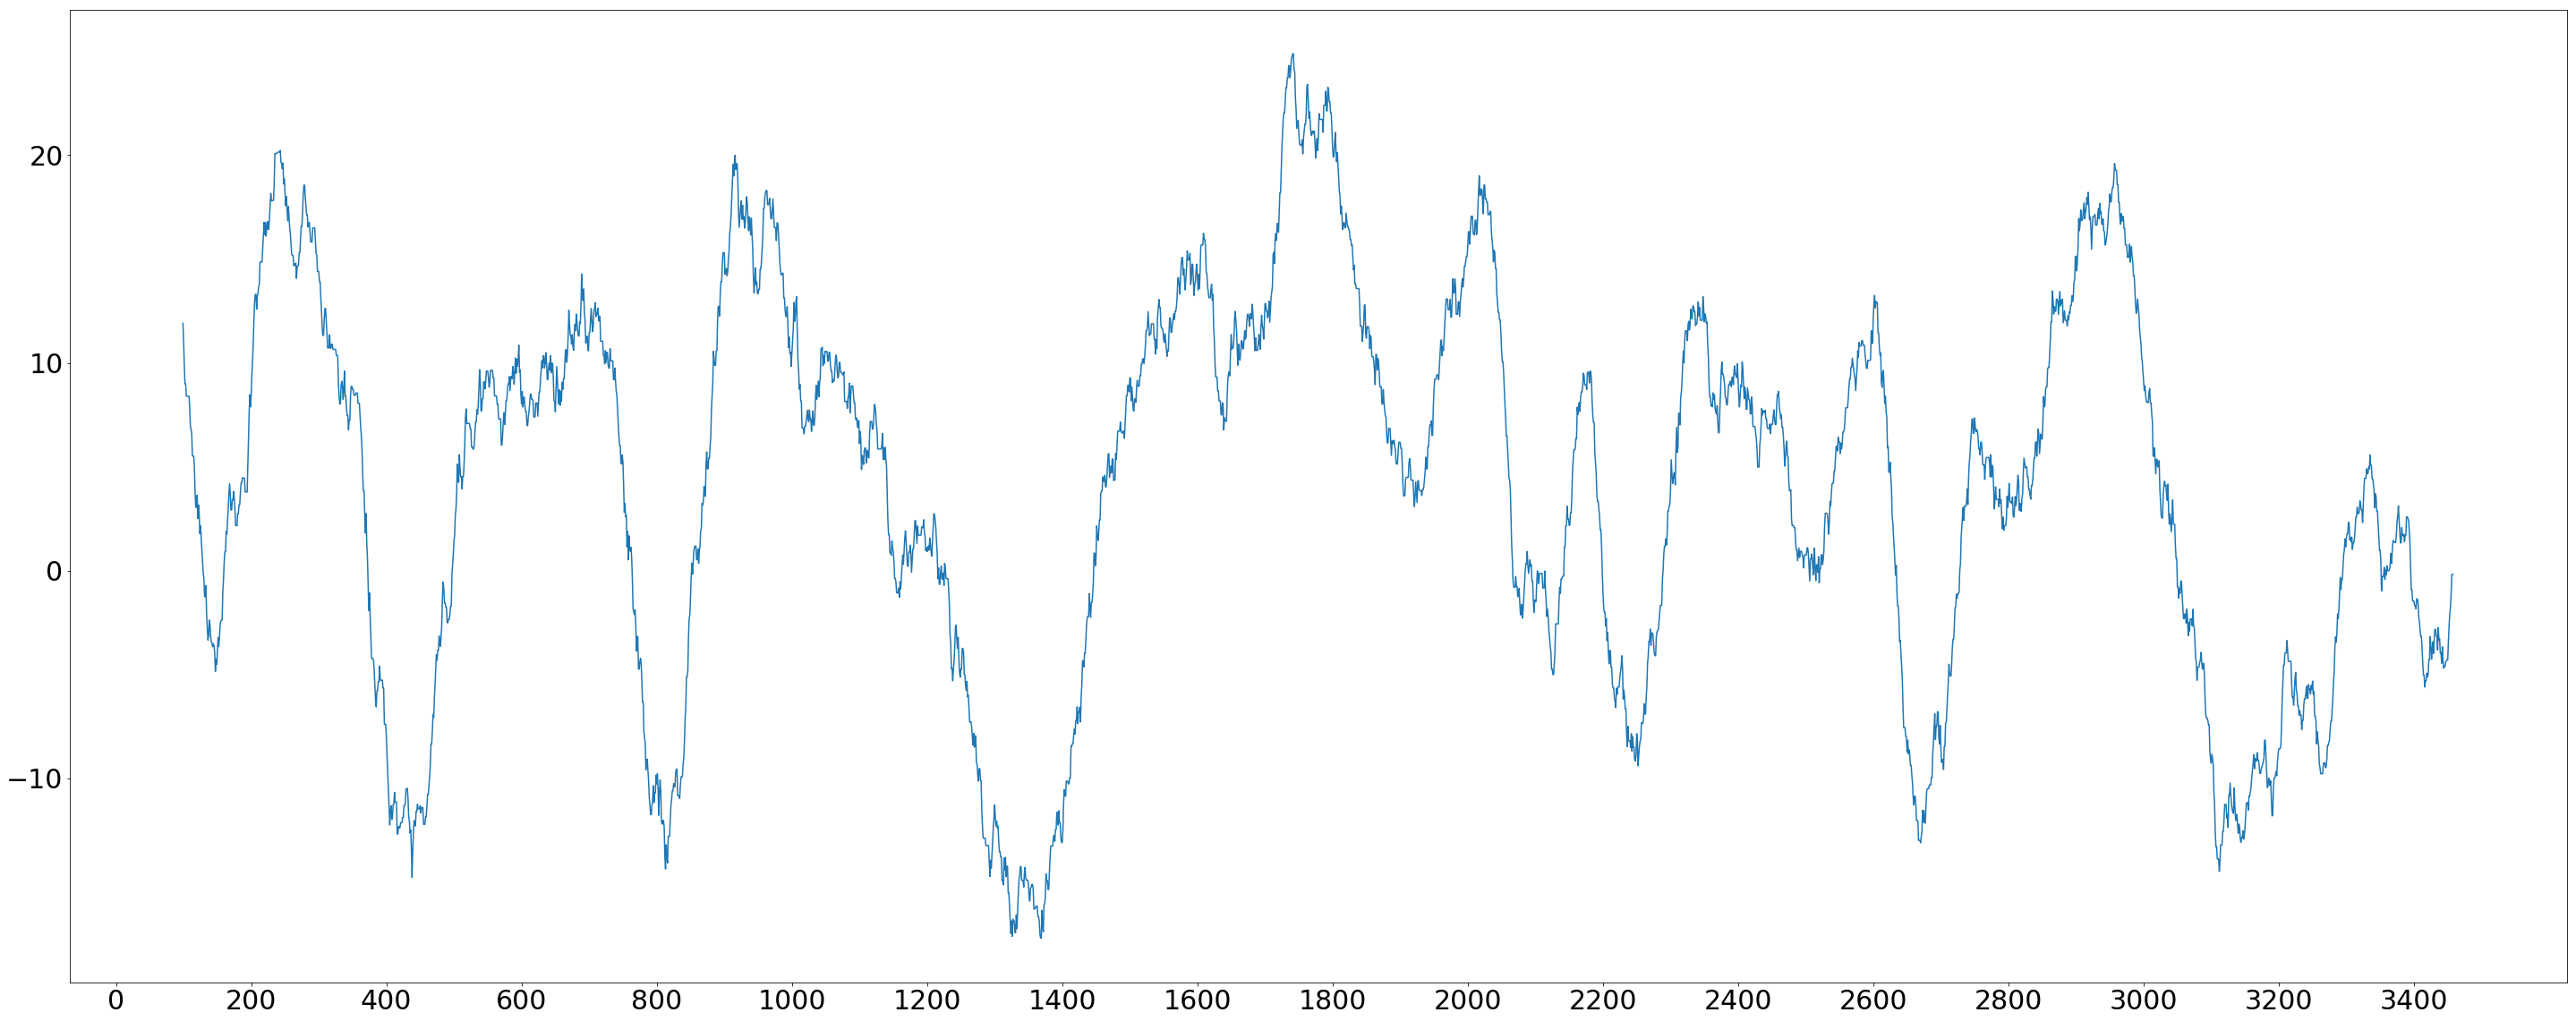

In [45]:
plot_sentiment(movie_score).savefig('inside_out.png')
plot_sentiment(movie_score).show()